# Analyzing Gaia Cluster Data Using Astroquery and Numpy

We will investigate Gaia data towards M45, the Pleiades cluster.

If you don't have internet access, feel free to skip to the part where we read in data from our local file.

## Dependencies
* numpy
* matplotlib
* astopy (`conda install astropy`)
* astroquery (`conda install astroquery`)

### Import packages

In [1]:
# common packages
import numpy as np                              # scientific computing
# astropy packages
from astropy import coordinates                 # celestial coordinates
import astropy.units as u                       # astrophysical units
from astropy.coordinates import SkyCoord        # celestial coordinate representation
from astropy.coordinates import Galactocentric  # 
# astroquery packages
from astroquery.gaia import Gaia                # query method for Gaia data
from astroquery.simbad import Simbad            # query method for SIMBAD
# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


### Astroquery search of Gaia data
Gaia is an ambitious mission to chart a three-dimensional map of our Galaxy, the Milky Way, in the process revealing the composition, formation, and evolution of the Galaxy. Gaia will provide unprecedented positional and radial velocity measurements with the accuracies needed to produce a stereoscopic and kinematic census of about one billion stars in our Galaxy and throughout the Local Group. This amounts to about 1 per cent of the Galactic stellar population.

We will be using the [`astroquery.gaia`](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html#) package to access the European Space Agency Gaia Archive: http://gea.esac.esa.int/archive/. First we will need to create a `SkyCoord` object. Conveniently, we can do this by simply searching for the appropriate SIMBAD name; in our case, this is M45.

In [2]:
coord   = SkyCoord.from_name('M45')
width   = u.Quantity(0.5, u.deg)
height  = u.Quantity(0.5, u.deg)
results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


Let's take a look at our Gaia data:

In [3]:
results

dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.004203348092152605,1635721458409799680,Gaia DR2 65225812899613312,65225812899613312,793417617,2015.5,56.74709494788445,3.7528824842369826,24.11995190424078,2.255096423236962,--,--,--,--,--,--,--,0.18694782,--,--,--,--,--,--,--,--,--,112,0,112,0,80.017,10720.071,17.46796852673929,230.14463322044125,3,False,0.0027898178,--,--,0.06775964,14,9,7.780396,0,14,False,119,129.31445457900261,1.7315182602929846,74.6827,20.409248,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,--,--,0,--,--,--,NOT_AVAILABLE,166.56610670575472,-23.52052482655676,59.88486929271797,4.090132901192946,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+65225812899613312,
0.006105312174472294,1635721458409799680,Gaia DR2 65225920273742848,65225920273742848,1268237079,2015.5,56.75615178913603,1.0324099035185628,24.119112926172495,0.5819019686517866,0.2954812444291199,1.1456881247225326,0.2579072,3.852501583120748,2.3070494533638066,-0.940271722867274,1.5281170611535584,0.044709854,0.16266313,-0.3795013,0.06118952,-0.2658241,0.26517525,0.35782832,-0.02402293,-0.36843428,0.3359764,128,0,128,0,2.164927,159.38231,1.7098683932448941,1.016398788739502,31,False,0.038870335,1.0397383146577845,0.20303077128140878,0.1062376,15,9,2.14273

As you can see, the output data is formatted in a table. The column names are given at the top with the units (e.g., `mas/yr`) and data type (e.g., `float64`) of each immediately beneath. We can grab all of the column names by calling `keys()`:

In [4]:
results.keys()

['dist',
 'solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'ph

### Extract subset of information and save to file

Since we'd like to learn how to read in our own data file, let's first extract a subset of the Gaia data and write this to a new file. We can use the above column names to grab the subset we're interested in.

In [6]:
ra                    = results["ra"]                    # deg
ra_error              = results["ra_error"]              # mas
dec                   = results["dec"]                   # deg
dec_error             = results["dec_error"]             # mas
parallax              = results["parallax"]              # mas
parallax_error        = results["parallax_error"]        # mas
pmra                  = results["pmra"]                  # mas/yr
pmra_error            = results["pmra_error"]            # mas/yr
pmdec                 = results["pmdec"]                 # mas/yr
pmdec_error           = results["pmdec_error"]           # mas/yr
radial_velocity       = results["radial_velocity"]       # km/s
radial_velocity_error = results["radial_velocity_error"] # km/s

To output our data to a new file, we can use the function [`np.savetxt(fname,X,header)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html) where `fname` is the output file name, $X$ is the data we want to write, and `header` is a comment to be appended to the top of the output file (typically the column names). When writing your data to a file, each line of $X$ will get written to a new row in `fname`. However, here we have columns of data instead of rows. To put our data into a format we can easily write to a new file, we can collect all of the data into an array and then take the transpose using [`np.transpose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html). This will turn our data of columns into the rows we need to output them into a new file.

In [7]:
myfile = "gaia_results.dat" # define an output file name
np.savetxt(myfile, np.transpose([ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error]),
          header="ra  ra_error dec dec_error parallax parallax_error pmra   pmra_error pmdec  pmdec_error radial_velocity radial_velocity_error \n"+
                 "deg mas      deg mas       mas      mas            mas/yr mas/yr     mas/yr mas/yr      km/s            km/s")

Take a few minutes to convince yourself why we needed to take the transpose of the data before writing it to a new file. Try defining a new filename `fname` and see what happend when you write the data without taking the transpose.

In [8]:
mynewfile = "test.dat" # define a new output file name
np.savetxt(mynewfile, [ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error],
          header="ra  ra_error dec dec_error parallax parallax_error pmra   pmra_error pmdec  pmdec_error radial_velocity radial_velocity_error \n"+
                 "deg mas      deg mas       mas      mas            mas/yr mas/yr     mas/yr mas/yr      km/s            km/s")

### Read in our new file (start here if you don't have internet access)

Let's now read in the file we just created. To load in our file, we will use the function [`np.loadtxt(fname)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). In principle you can load everything into a single variable as so:

In [9]:
data = np.loadtxt(myfile)

In [10]:
data

array([[56.74709495,  3.75288248, 24.1199519 , ...,         nan,
                nan,         nan],
       [56.75615179,  1.0324099 , 24.11911293, ...,  1.52811706,
                nan,         nan],
       [56.75299343,  0.36244961, 24.10819701, ...,  0.50400308,
                nan,         nan],
       ...,
       [56.98835796,  1.05638092, 24.36517913, ...,         nan,
                nan,         nan],
       [56.99875143,  9.77611697, 23.87308513, ...,         nan,
                nan,         nan],
       [56.50013665,  2.8050066 , 24.36466825, ...,         nan,
                nan,         nan]])

However you'd have to manually slice this NDarray into the arrays associated with each column, which is a little tedious (especially when working with large data sets).

Instead, let's unpack each of the columns into separate variables all at once! You can do this by setting `unpack=True` within `np.loadtxt()`. It's helpful to define variables that specify dimensions, especially when dealing with large data sets and/or performing lots of data manipulation.

In [11]:
ra_deg,ra_error_mas,dec_deg,dec_error_mas,parallax_mas,parallax_error_mas,pmra_masyr,pmra_error_masyr,pmdec_masyr,pmdec_error_masyr,radial_velocity_kms,radial_velocity_error_kms = np.loadtxt(myfile,unpack=True)

Now that we have our data loaded, let's do some simple inspection to make sure everything is reasonable.

### Inspect Right Ascension and Declination coordinates

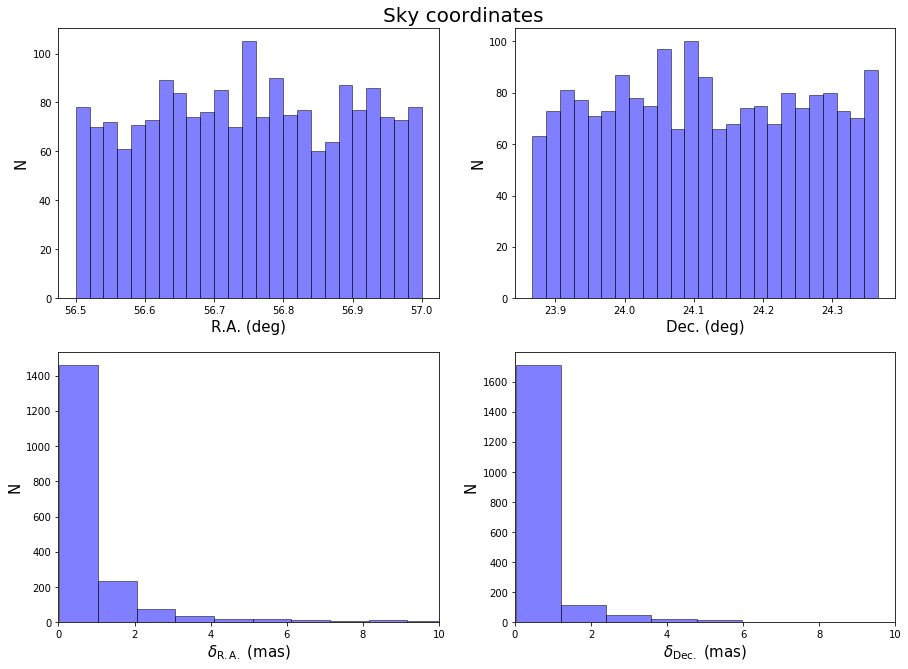

In [12]:
fig  = plt.figure(figsize=(15,10))
# plot R.A.
ax = fig.add_subplot(221)
ax.hist(ra_deg,25,facecolor='blue',edgecolor="black",alpha=0.5)
plt.xlabel("R.A. (deg)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec.
ax = fig.add_subplot(222)
ax.hist(dec_deg,25,facecolor='blue',edgecolor="black",alpha=0.5)
plt.xlabel("Dec. (deg)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot R.A. uncertainty
ax = fig.add_subplot(223)
ax.hist(ra_error_mas,50,facecolor='blue',edgecolor="black",alpha=0.5)
plt.xlim(0,10)
plt.xlabel("$\delta_\mathrm{R.A.}$ (mas)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec. uncertainty
ax = fig.add_subplot(224)
ax.hist(dec_error_mas,40,facecolor='blue',edgecolor="black",alpha=0.5)
plt.xlim(0,10)
plt.xlabel("$\delta_\mathrm{Dec.}$ (mas)",fontsize=15)
plt.ylabel("N",fontsize=15)

plt.suptitle("Sky coordinates",fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

### Plot Declination versus Right Ascension coordinates

Recall that we have M45's coordinate information within the `SkyCoord` object -- we can use this to grab the Right Ascension and Declination via `(R.A.,Dec.)=(coord.ra.deg,coord.dec.deg)`.

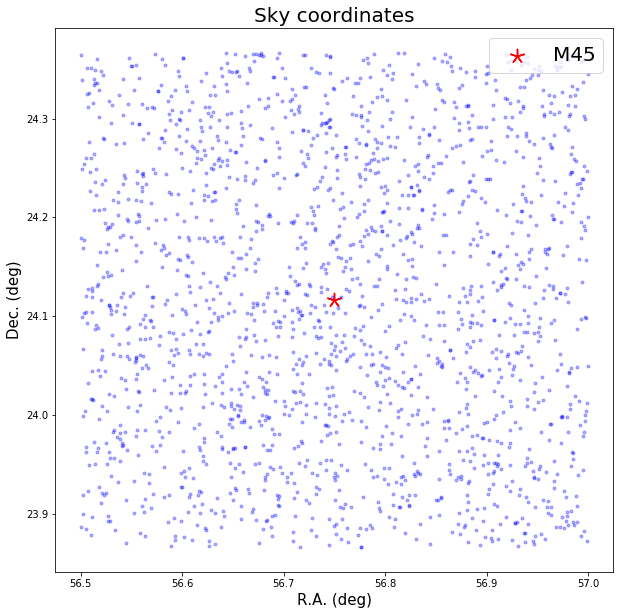

In [13]:
fig  = plt.figure(figsize=(10,10))
# plot Dec. vs. R.A.
ax = fig.add_subplot(111)
ax.plot(ra_deg,dec_deg,".",color='blue',alpha=0.3)
ax.scatter(coord.ra.deg,coord.dec.deg,marker=(5,2),s=200,color="red",label="M45")
plt.xlabel("R.A. (deg)",fontsize=15)
plt.ylabel("Dec. (deg)",fontsize=15)
plt.legend(loc="upper right",prop={'size':20})

plt.title("Sky coordinates",fontsize=20)
plt.show()

### Plot parallax angles

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


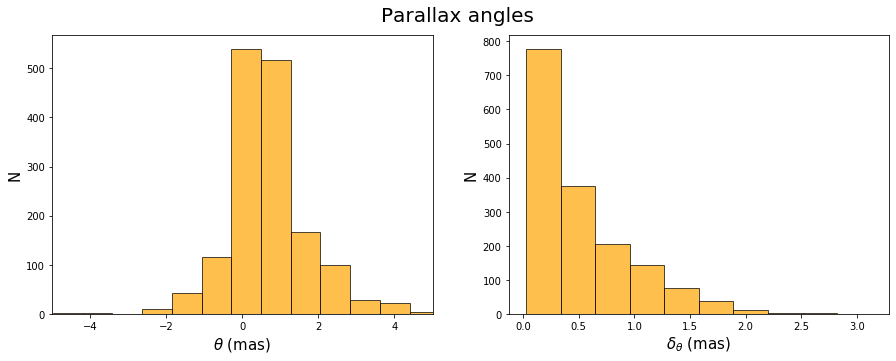

In [14]:
fig  = plt.figure(figsize=(15,5))
# plot R.A.
ax = fig.add_subplot(121)
ax.hist(parallax,20,facecolor='orange',edgecolor="black",alpha=0.7)
plt.xlim(-5,5)
plt.xlabel(r"$\theta$ (mas)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec.
ax = fig.add_subplot(122)
ax.hist(parallax_error,10,facecolor='orange',edgecolor="black",alpha=0.7)
plt.xlabel(r"$\delta_{\theta}$ (mas)",fontsize=15)
plt.ylabel("N",fontsize=15)

plt.suptitle("Parallax angles",fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

### Convert parallax angles to distance

Let's convert the Gaia parallax angles to a distance using the equation we learned in AST221:

$d[\mathrm{pc}] = \dfrac{1}{\theta['']}$

Defining a function to do this for us...

In [15]:
def fGaiaParallax(p_mas):
    '''
    Computes distances using Gaia parallax angles.

    Input
    p_mas : Gaia parallax angle in milli-arcseconds

    Output
    d_pc   : distance in parsecs
    '''
    
    # convert parallax from milli-arcsec to arcsec
    p_arcsec = p_mas*1E-3

    # compute distance
    d_pc     = 1./p_arcsec

    return d_pc

Parallax angles observationally can be negative due to uncertainties but these have no physical meaning. So we can mask them out before translating them to a distance (alternatively we could just set them to zero but this would result in an undefined distance).

In [21]:
parallax_mas_pos = parallax[parallax_mas>0]        # positive parallax angles in mas
distance_pc      = fGaiaParallax(parallax_mas_pos) # distance in pc
distance_kpc     = distance_pc*1E-3                # distance in kpc

In [22]:
parallax_mas

array([       nan, 0.29548124, 0.97405267, ...,        nan,        nan,
              nan])

Now to plot the result.

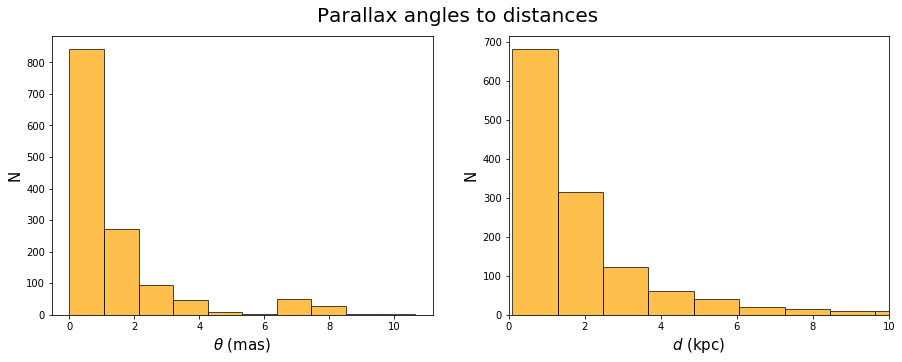

In [23]:
fig  = plt.figure(figsize=(15,5))
# plot R.A.
ax = fig.add_subplot(121)
ax.hist(parallax_mas_pos,10,facecolor='orange',edgecolor="black",alpha=0.7)
plt.xlabel(r"$\theta$ (mas)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec.
ax = fig.add_subplot(122)
ax.hist(distance_kpc,900,facecolor='orange',edgecolor="black",alpha=0.7)
plt.xlim(0,10)
plt.xlabel("$d$ (kpc)",fontsize=15)
plt.ylabel("N",fontsize=15)

plt.suptitle("Parallax angles to distances",fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

### Plot proper motions

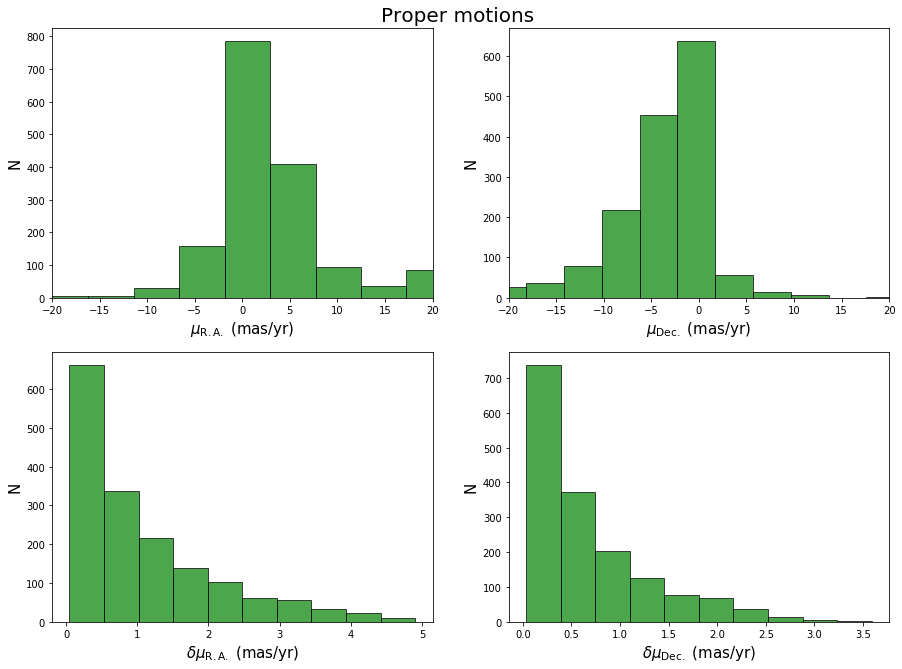

In [24]:
fig  = plt.figure(figsize=(15,10))
# plot R.A.
ax = fig.add_subplot(221)
ax.hist(pmra,40,facecolor='green',edgecolor="black",alpha=0.7)
plt.xlim(-20,20)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec.
ax = fig.add_subplot(222)
ax.hist(pmdec,30,facecolor='green',edgecolor="black",alpha=0.7)
plt.xlim(-20,20)
plt.xlabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot R.A. uncertainty
ax = fig.add_subplot(223)
ax.hist(pmra_error,facecolor='green',edgecolor="black",alpha=0.7)
plt.xlabel("$\delta\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("N",fontsize=15)
# plot Dec. uncertainty
ax = fig.add_subplot(224)
ax.hist(pmdec_error,facecolor='green',edgecolor="black",alpha=0.7)
plt.xlabel("$\delta\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)
plt.ylabel("N",fontsize=15)

plt.suptitle("Proper motions",fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

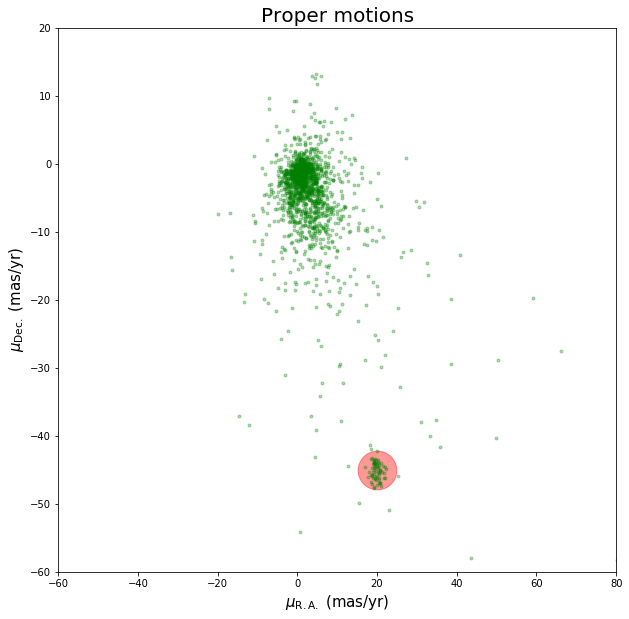

In [25]:
fig  = plt.figure(figsize=(10,10))
# plot Dec. proper motion vs. R.A. proper motion
ax = fig.add_subplot(111)
plt.scatter(20,-45,color="red",alpha=0.4,s=1500)
ax.plot(pmra_masyr,pmdec_masyr,".",color='green',alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-60,20)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)

plt.title("Proper motions",fontsize=20)
plt.show()

### Extract M31 from Gaia data
Having M31 localized in the above proper motion plot, we can pull it out from the rest of the Gaia data set. To do this, we will want to find each of the stars that satisfy a given set of conditions on the Right Ascension and Declination, for which we will use the very helpful function [`np.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html). We will first set up the conditions on R.A. and Dec. as follows:

In [26]:
conditions = np.array( (pmra_masyr>10) & (pmra_masyr<30) &    # pmra
                       (pmdec_masyr>-50) & (pmdec_masyr<-40)) # pmdec

In [27]:
conditions

array([False, False, False, ..., False, False, False])

As you can see, this returns an array of booleans which tells us whether each star satisfies our conditions. We'll then want to use this to create an array of indices for which `condition==True` which we can do with the following:

In [28]:
ii         = np.array(np.where(conditions)[0])

In [29]:
ii

array([  25,   41,   74,  166,  168,  184,  196,  198,  232,  233,  320,
        326,  339,  349,  356,  359,  376,  382,  388,  394,  399,  418,
        426,  429,  471,  492,  496,  499,  508,  524,  535,  538,  567,
        603,  614,  644,  654,  736,  751,  779,  818,  858,  860,  878,
        921,  948,  963,  987,  999, 1001, 1026, 1151, 1162, 1252, 1271,
       1329, 1334, 1394, 1487, 1528, 1611, 1673, 1702, 1729, 1748, 1765,
       1784, 1800, 1809, 1833, 1905])

The array `ii` now contains the indices satisfying the conditions we set up on R.A. and Dec., which we can now apply to each of the Gaia arrays using canonical array indexing.

In [30]:
ra_deg_M45                    = ra_deg[ii]
ra_error_mas_M45              = ra_error_mas[ii]
dec_deg_M45                   = dec_deg[ii]
dec_error_mas_M45             = dec_error_mas[ii]
parallax_mas_M45              = parallax_mas[ii]
parallax_error_mas_M45        = parallax_error_mas[ii]
distance_pc_M45               = fGaiaParallax(parallax_mas)[ii]
pmra_masyr_M45                = pmra_masyr[ii]
pmra_error_masyr_M45          = pmra_error_masyr[ii]
pmdec_masyr_M45               = pmdec_masyr[ii]
pmdec_error_masyr_M45         = pmdec_error_masyr[ii]
radial_velocity_kms_M45       = radial_velocity_kms[ii]
radial_velocity_error_kms_M45 = radial_velocity_error_kms[ii]

To check that this worked, let's plot the proper motions again but this time only the ones associated with M45.

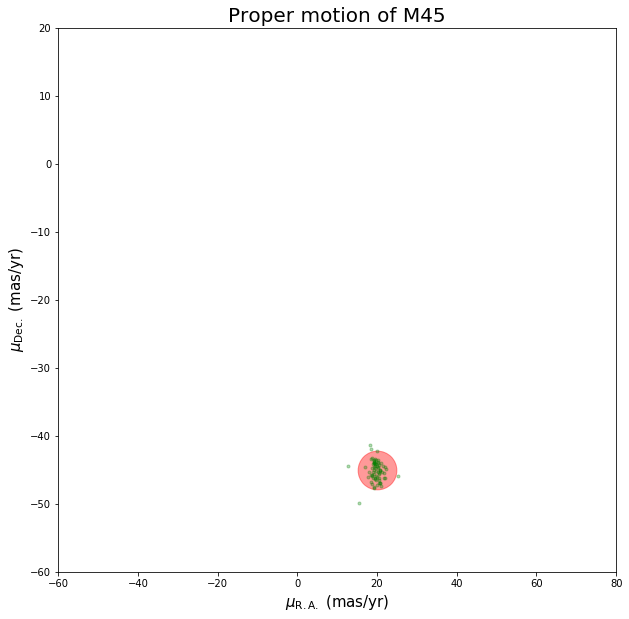

In [31]:
fig  = plt.figure(figsize=(10,10))
# plot Dec. proper motion vs. R.A. proper motion
ax = fig.add_subplot(111)
plt.scatter(20,-45,color="red",alpha=0.4,s=1500)
ax.plot(pmra_masyr_M45,pmdec_masyr_M45,".",color='green',alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-60,20)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)

plt.title("Proper motion of M45",fontsize=20)
plt.show()

Voila!

The above technique can be applied to a variety of data sets and conditions. As an exercise, let's take a look at the radial velocities of the stars in M45.

In [32]:
radial_velocity_kms

array([nan, nan, nan, ..., nan, nan, nan])

Oops, it looks like a number of these stars don't have radial velocity measurements! Try using the above method to select the stars for which `radial_velocity_kms!=nan` and collect the rest of the Gaia data for this subset. Hint: the function `np.isnan()` will be your friend here!

(array([ 2.,  2.,  8.,  6.,  7., 12.,  4.,  5.,  1.,  2.]),
 array([-58.4017841 , -45.90961325, -33.41744241, -20.92527156,
         -8.43310071,   4.05907013,  16.55124098,  29.04341183,
         41.53558267,  54.02775352,  66.51992437]),
 <a list of 10 Patch objects>)

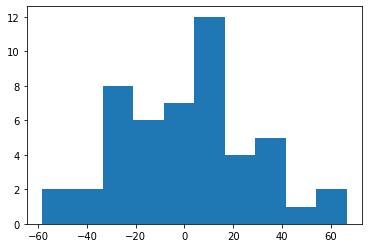

In [36]:
plt.hist(radial_velocity_kms[np.isnan(radial_velocity_kms) == False])